In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def import_vsweep(fpath="schematic/data/dac7_L0.15W1vout-", num=10):
    list_df = []
    for i in range(num):
        df_tmp = pd.read_csv(fpath+str(i+1)+".txt", delimiter="\s+")

        df_tmp["bit"] = df_tmp.index
        df_tmp["v(b0)"] = (df_tmp["v(b0)"] > 1e-3).astype(float)
        df_tmp["v(b1)"] = (df_tmp["v(b1)"] > 1e-3).astype(float)
        df_tmp["v(b2)"] = (df_tmp["v(b2)"] > 1e-3).astype(float)
        df_tmp["v(b3)"] = (df_tmp["v(b3)"] > 1e-3).astype(float)
        df_tmp["v(b4)"] = (df_tmp["v(b4)"] > 1e-3).astype(float)
        df_tmp["v(b5)"] = (df_tmp["v(b5)"] > 1e-3).astype(float)
        df_tmp["v(b6)"] = (df_tmp["v(b6)"] > 1e-3).astype(float)
        df_tmp["src"] = np.ones(len(df_tmp.iloc[:, [1]]))*i
        df_tmp["lsb"] = df_tmp["i(vbias)"]/(3*2**5)
    # my_df = pd.read_csv("sample_data/mcdactut1.txt", delimiter="\s+")
        df_tmp["dnl"] = np.array([df_tmp.lsb.iloc[0]]+list(df_tmp["i(viout)"].iloc[1:].values - df_tmp["i(viout)"].iloc[0:-1].values))-df_tmp["lsb"]
        df_tmp["inl"] = df_tmp["dnl"].cumsum()
        list_df.append(df_tmp)
        
    return pd.concat(list_df).reset_index(drop=True)

In [5]:
my_df = import_vsweep(fpath="schematic/data/dac7_L"+str(3)+"W"+str(12)+"op-", num=10)
# my_df["bit"] = my_df.index
my_df.tail(20)


,vbias#branch,v(b0),v(b1),v(b2),v(b3),v(b4),v(b5),v(b6),i(vbias),i(viout),v(vout),bit,src,lsb,dnl,inl
300,7.380228e-07,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.380228e-07,1.137069e-07,1.0,12,9.0,7.687737e-09,-6.870301e-10,-2.224550e-08
301,7.380235e-07,1.0,0.0,1.0,1.0,0.0,0.0,0.0,7.380235e-07,1.202859e-07,1.0,13,9.0,7.687745e-09,-1.108687e-09,-2.335419e-08
302,7.380235e-07,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.380235e-07,1.263004e-07,1.0,14,9.0,7.687745e-09,-1.673328e-09,-2.502752e-08
303,7.380243e-07,1.0,1.0,1.0,1.0,0.0,0.0,0.0,7.380243e-07,1.318963e-07,1.0,15,9.0,7.687753e-09,-2.091860e-09,-2.711938e-08
304,7.380220e-07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.380220e-07,1.425110e-07,1.0,16,9.0,7.687729e-09,2.926970e-09,-2.419241e-08
305,7.380228e-07,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7.380228e-07,1.500741e-07,1.0,17,9.0,7.687737e-09,-1.246072e-10,-2.431702e-08
306,7.380228e-07,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7.380228e-07,1.574450e-07,1.0,18,9.0,7.687737e-09,-3.168082e-10,-2.463382e-08
307,7.380236e-07,1.0,1.0,0.0,0.0,1.0,0.0,0.0,7.380236e-07,1.641992e-07,1.0,19,9.0,7.687745e-09,-9.335813e-10,-2.556740e-08
308,7.380227e-07,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.380227e-07,1.717122e-07,1.0,20,9.0,7.687737e-09,-1.747279e-10,-2.574213e-08
309,7.380235e-07,1.0,0.0,1.0,0.0,1.0,0.0,0.0,7.380235e-07,1.785475e-07,1.0,21,9.0,7.687745e-09,-8.524380e-10,-2.659457e-08


In [6]:
LW_pairs = ([
    (0.25, 12), (0.5, 12), (3, 12),
    (0.25, 9), (0.5, 9), (3, 9),
    (0.25, 6), (0.5, 6), (3, 6),
    (0.25, 4), (0.5, 4), (3, 4),
    (0.25, 3), (0.5, 3), (3, 3),
    (0.25, 1), (0.5, 1), (3, 1),
])

In [15]:
LW_pairs = [(16, 64)]
L_list = []
W_list = []
per_list = []
for each in LW_pairs:
    L_list.append(each[0])
    W_list.append(each[1])
    my_df = import_vsweep(fpath="schematic/data/dac7_LDS_op-64x16-", num=10)
    per_list.append(my_df)

In [16]:
per_list[0]

,vbias#branch,v(b0),v(b1),v(b2),v(b3),v(b4),v(b5),v(b6),i(vbias),i(viout),v(vout),bit,src,lsb,dnl,inl
0,1.586392e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.586392e-07,3.560586e-09,1.0,0,0.0,1.652491e-09,0.000000e+00,0.000000e+00
1,1.586402e-07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.586402e-07,5.759063e-09,1.0,1,0.0,1.652502e-09,5.459745e-10,5.459745e-10
2,1.586401e-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.586401e-07,1.007572e-08,1.0,2,0.0,1.652502e-09,2.664159e-09,3.210134e-09
3,1.586410e-07,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.586410e-07,1.566210e-08,1.0,3,0.0,1.652510e-09,3.933862e-09,7.143996e-09
4,1.586402e-07,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.586402e-07,2.063047e-08,1.0,4,0.0,1.652502e-09,3.315869e-09,1.045986e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1.578269e-07,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.578269e-07,6.509570e-07,1.0,123,9.0,1.644030e-09,4.130920e-09,4.451189e-07
1276,1.578259e-07,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.578259e-07,6.564381e-07,1.0,124,9.0,1.644019e-09,3.837051e-09,4.489560e-07
1277,1.578266e-07,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.578266e-07,6.621563e-07,1.0,125,9.0,1.644027e-09,4.074251e-09,4.530302e-07
1278,1.578268e-07,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.578268e-07,6.678979e-07,1.0,126,9.0,1.644029e-09,4.097582e-09,4.571278e-07


Text(0, 0.5, 'INL ($LSB$)')

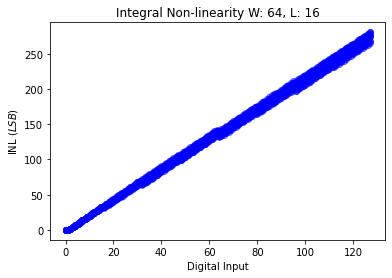

In [17]:
j = -1
fig, ax = plt.subplots()
ax.plot(per_list[j].bit, per_list[j].inl/per_list[j].lsb, "bo", alpha=0.5)
ax.set_title("Integral Non-linearity W: "+str(W_list[j])+", L: "+str(L_list[j]))
ax.set_xlabel("Digital Input")
ax.set_ylabel("INL ($LSB$)")

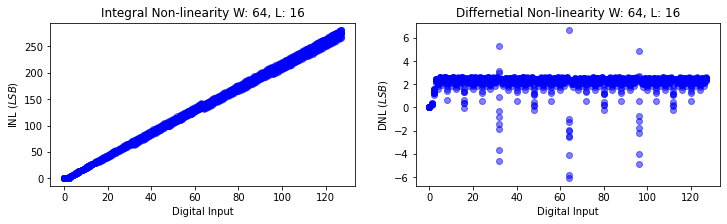

In [18]:
for j in range(len(L_list)):
    fig, ax = plt.subplots(1,2, figsize=(12, 3))
    ax[0].plot(per_list[j].bit, per_list[j].inl/per_list[j].lsb, "bo", alpha=0.5)
    ax[0].set_title("Integral Non-linearity W: "+str(W_list[j])+", L: "+str(L_list[j]))
    ax[0].set_xlabel("Digital Input")
    ax[0].set_ylabel("INL ($LSB$)")
    ax[1].plot(per_list[j].bit, per_list[j].dnl/per_list[j].lsb, "bo", alpha=0.5)
    ax[1].set_title("Differnetial Non-linearity W: "+str(W_list[j])+", L: "+str(L_list[j]))
    ax[1].set_xlabel("Digital Input")
    ax[1].set_ylabel("DNL ($LSB$)")